In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [ ]:
with open("example_index", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
  f.write(r.content)

with open("example_arcs", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
  f.write(r.content)

In [ ]:
nodes = np.loadtxt("example_index", dtype = object)[:,0] # 숫자 문자 다 받음
num_nodes = nodes.shape[0]

edges = np.loadtxt("example_arcs",dtype=int)
num_edges = edges.shape[0]
print(num_nodes, num_edges)

106 141


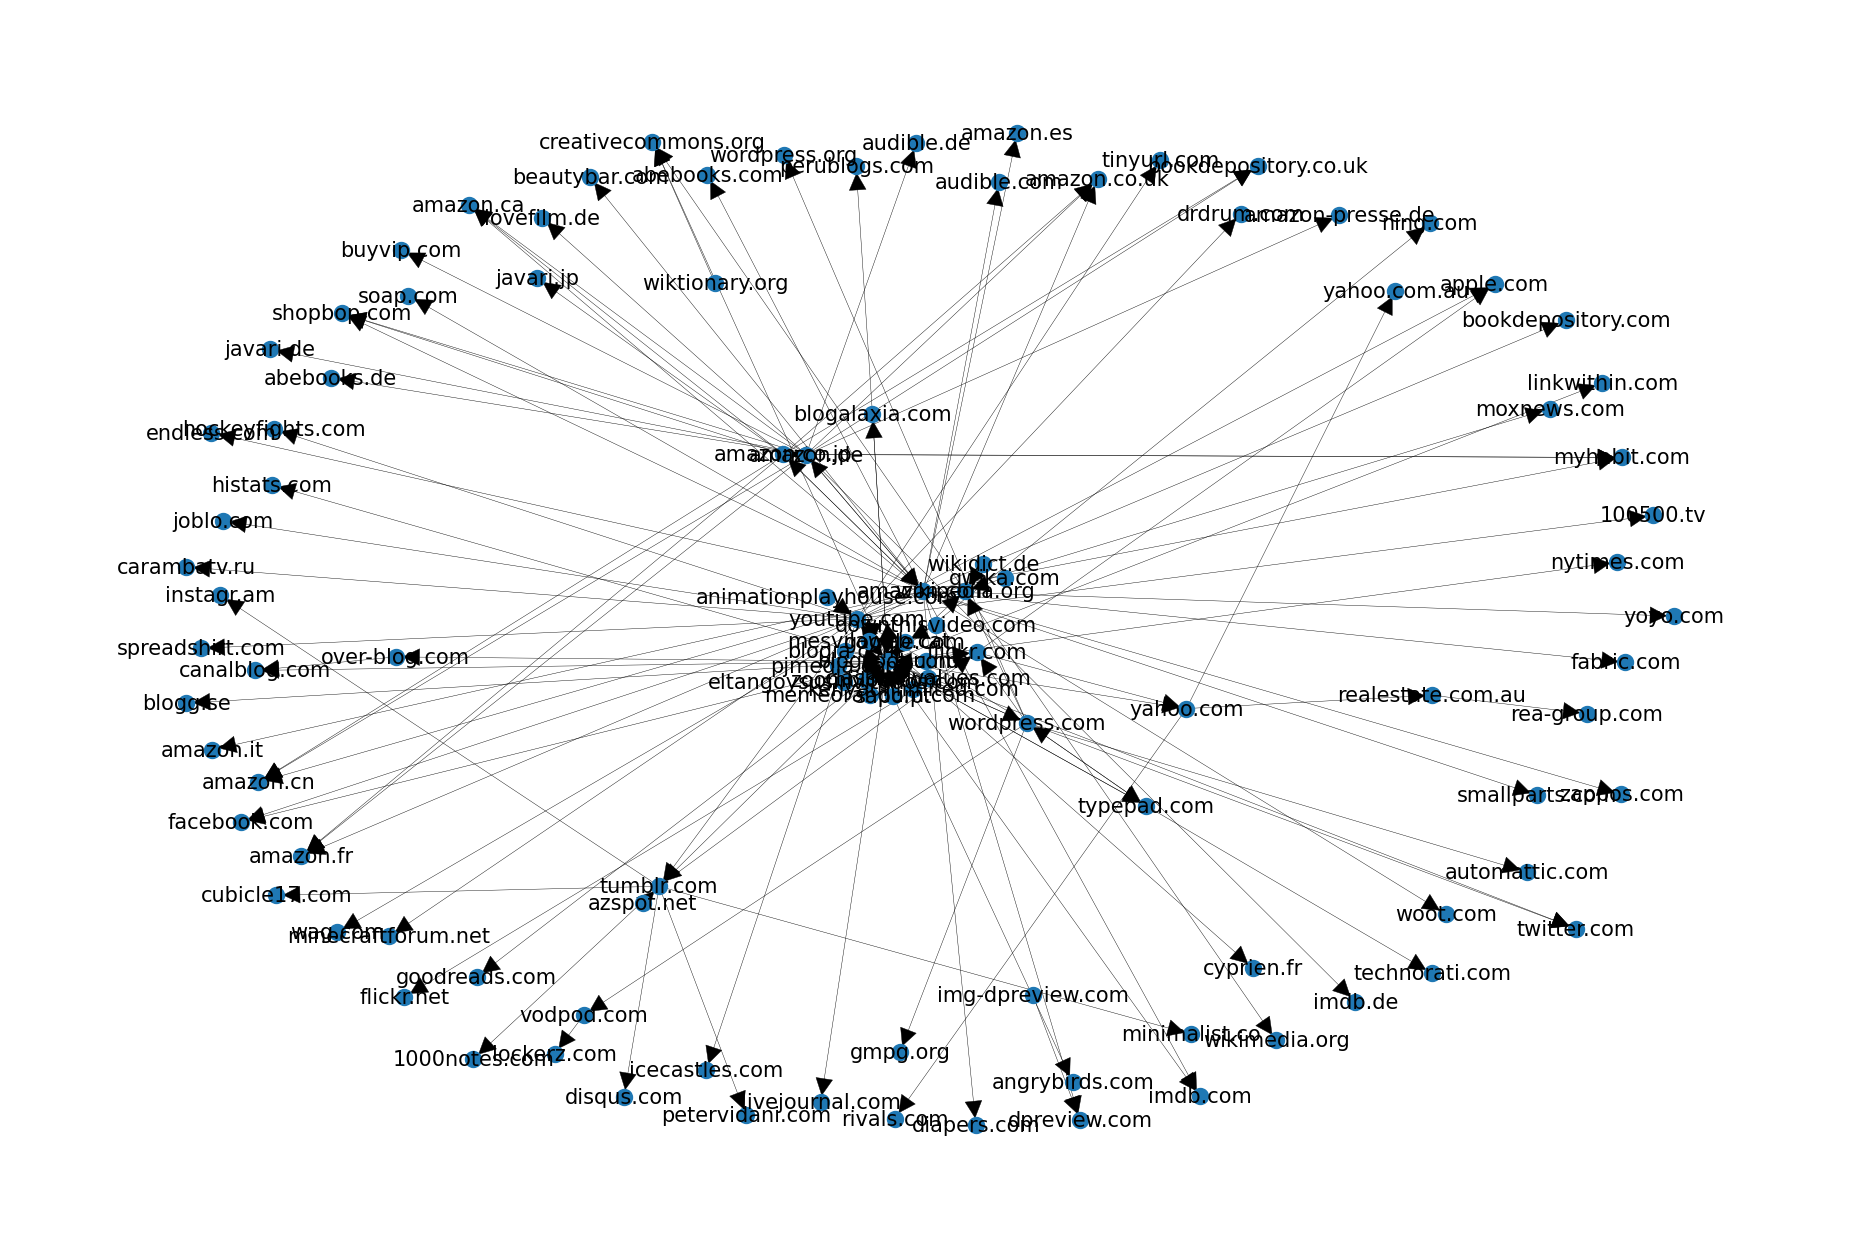

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(dpi=300) # 그림 선명하게

G = nx.DiGraph()

for e in edges:
  G.add_edge(nodes[e[0]], nodes[e[1]])

nx.draw(G, with_labels = True, node_size = 10, font_size=5, width = 0.1)

In [ ]:
def pagerank(num_nodes, edges, beta=0.15, epochs = 100, threshold=10e-20):

  neighbors = [[] for _ in range(num_nodes)] # 해당 인덱스에서 나가는 숫자를 리스트로 저장하는 리스트

  for e in edges:
    neighbors[e[0]].append(e[1])

  r = [1/num_nodes] * num_nodes

  for epoch in range(epochs):

    r_next = [0] * num_nodes

    for u in range(num_nodes):
      for v in neighbors[u]:
        r_next[v] += (1-beta) * r[u] / len(neighbors[u])
    
    teleport_prob = 1 - sum(r_next) # 나가지 않는 노드가 있어서 베타가 안됨.
    
    for u in range(num_nodes):
      r_next[u] += teleport_prob / num_nodes

    delta = 0
    for u in range(num_nodes):
      delta += abs(r[u] - r_next[u])

    print(epoch,delta)

    r = r_next

    if (delta < threshold):
      break
 
  return r
    

ranks = pagerank(num_nodes,edges)

0 0.33116178007027064
1 0.13352729375720582
2 0.032034222299378495
3 0.008160661420055733
4 0.0017212771046270555
5 0.0005096107949532124
6 0.00015110850314924932
7 4.2782948553539424e-05
8 1.2767738748017086e-05
9 3.5942648607635228e-06
10 1.0472686344832616e-06
11 3.207709169516376e-07
12 9.280288248980639e-08
13 2.7313882986976235e-08
14 8.16487669922511e-09
15 2.3918889065568938e-09
16 7.102141123468964e-10
17 2.10562890040622e-10
18 6.198331604923002e-11
19 1.8370672170975322e-11
20 5.4360136184095076e-12
21 1.6056912743867002e-12
22 4.753333143758809e-13
23 1.4060454189834815e-13
24 4.167152733991486e-14
25 1.2464855536631347e-14
26 3.773890921987544e-15
27 1.1596626436904955e-15
28 3.8424124992886277e-16
29 9.540979117872439e-17
30 2.7755575615628914e-17
31 3.469446951953614e-18
32 0.0


In [ ]:
top20 = sorted(zip(ranks,nodes), reverse=True)[:20]

for r, n in top20:
  print(r, n)

0.08542594911159558 blogspot.com
0.024220197373806863 creativecommons.org
0.021582303280083367 wikipedia.org
0.017731207533385685 canalblog.com
0.016119021304844737 youtube.com
0.01590404148659131 tumblr.com
0.01590404148659131 google.com
0.015599869453139702 wikimedia.org
0.015057808460245193 rea-group.com
0.01315073740859083 yahoo.com
0.012801279935655208 lockerz.com
0.0126035626479212 wordpress.com
0.012586944367263622 flickr.com
0.012142774999178787 dpreview.com
0.010850014469982175 apple.com
0.010655739329606105 typepad.com
0.010655739329606105 twitter.com
0.010500776073530713 perublogs.com
0.01044075951135268 facebook.com
0.010153432824871673 yahoo.com.au
